In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dfdp = pd.read_csv('Data Pelanggan.csv',sep=',',engine='python')

In [16]:
dfdp.describe()

,Jenis Kelamin,Pendidikan Terakhir,Pekerjaan,Jenis Yogurt Bark Fruity sering anda dibeli,Berapa tingkat Kepuasan Anda terhadap produk Yogurt Bark Fruity,Yogurt Bark Fruity rasa apa yang anda sukai?
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1.329670,3.428571,1.527473,1.219780,4.164835,1.175824
std,0.472698,0.634960,1.204996,0.416392,0.763962,0.382780
min,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,1.000000,1.000000,4.000000,1.000000
50%,1.000000,3.000000,1.000000,1.000000,4.000000,1.000000
75%,2.000000,4.000000,1.000000,1.000000,5.000000,1.000000
max,2.000000,6.000000,5.000000,2.000000,5.000000,2.000000


In [12]:
dfdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   Umur                                                                      91 non-null     object
 1   Jenis Kelamin                                                             91 non-null     int64 
 2   Pendidikan Terakhir                                                       91 non-null     int64 
 3   Pekerjaan                                                                 91 non-null     int64 
 4   Berapa jumlah uang yang anda habiskan dalam sehari untuk membeli cemilan  91 non-null     object
 5   Seberapa sering anda membeli yogurt bark fruity ini                       91 non-null     object
 6   Jenis Yogurt Bark Fruity sering anda dibeli                               91

Text(0.5, 1.0, 'Grafik Data Pelanggan')

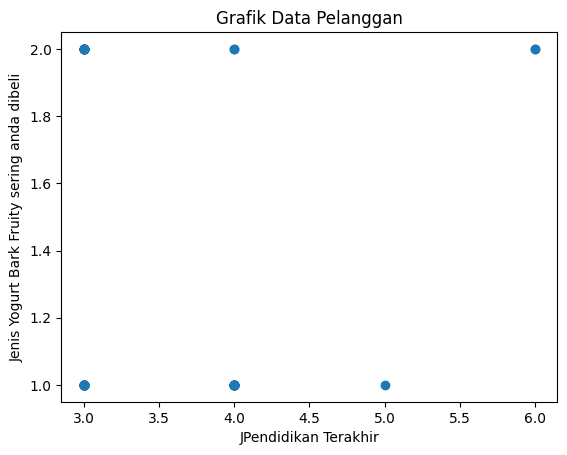

In [18]:
plt.scatter(dfdp['Pendidikan Terakhir'],dfdp['Jenis Yogurt Bark Fruity sering anda dibeli'])
plt.xlabel("JPendidikan Terakhir")
plt.ylabel("Jenis Yogurt Bark Fruity sering anda dibeli")
plt.title("Grafik Data Pelanggan")